<a href="https://colab.research.google.com/github/TenzinYangzom158/Machine-Learning---01/blob/main/Lab1_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tenzin Yangzom** 
**2147158**
**Machine Learning**

Simple Linear Regression

Example of Pizza Price increase with its diameter (Sir's example)

Predicted price =  [[22.46767241]]


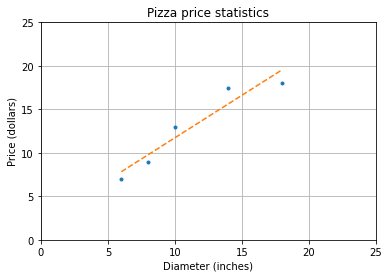

In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
x = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]
model = LinearRegression()
model.fit(x,y)
plt.figure()
plt.title("Pizza price statistics")
plt.xlabel("Diameter (inches)")
plt.ylabel("Price (dollars)")
plt.plot(x,y,'.')
plt.plot(x,model.predict(x),'--')
plt.axis([0,25,0,25])
plt.grid(True)
print ("Predicted price = ",model.predict([[21]])) # 22.467
plt.show()

R squared

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np
from numpy.linalg import inv,lstsq
from numpy import dot, transpose
x = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]
model = LinearRegression()

model.fit(x,y)
x_test = [[8], [9], [11], [16], [12]]
y_test = [[11], [8.5], [15], [18], [11]]
print ("Score = ",model.score(x_test, y_test))

Score =  0.6620052929422553


Multiple Regression

In [3]:
from sklearn.linear_model import LinearRegression
from numpy.linalg import lstsq
import numpy as np
x = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y = [[7], [9], [13], [17.5], [18]]
model = LinearRegression()
model.fit(x,y)
x1 = [[8, 2], [9, 0], [11, 2], [16, 2], [12, 0]]
y1 = [[11], [8.5], [15], [18], [11]]
predictions = model.predict([[8, 2], [9, 0], [12, 0]])
print ("values of Predictions: ",predictions)
print ("values of β1, β2: ",lstsq(x, y, rcond=None)[0])
#least-squares solution to find best regression line
#It is a cut-off ratio for smaller singular values of x and Y
print ("Score = ",model.score(x1, y1))

values of Predictions:  [[10.0625 ]
 [10.28125]
 [13.3125 ]]
values of β1, β2:  [[1.08548851]
 [0.65517241]]
Score =  0.7701677731318468


Example: Possum Dataset

In [4]:
import pandas as pd
import numpy as np

In [5]:
data_df = pd.read_csv('possum.csv')

In [7]:
data_df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [16]:
from sklearn import preprocessing
# Encode categorical variables to numeric as model cannot process text values.
le = preprocessing.LabelEncoder()
for name in data_df.columns:
    if data_df[name].dtypes == 'O':
        data_df[name] = data_df[name].astype(str)
        le.fit(data_df[name])
        data_df[name] = le.transform(data_df[name])

In [17]:
# fill missing values based on probability of occurrence
for column in data_df.columns:
    null_vals = data_df.isnull().values
    a, b = np.unique(data_df.values[~null_vals], return_counts = 1)
    data_df.loc[data_df[column].isna(), column] = np.random.choice(a, data_df[column].isnull().sum(), p = b / b.sum())

In [18]:
data_df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1.0,1.0,0.0,1.0,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2.0,1.0,0.0,0.0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3.0,1.0,0.0,0.0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4.0,1.0,0.0,0.0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5.0,1.0,0.0,0.0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [19]:
x = data_df.drop(['age'],axis=1).values
y = data_df['age'].values

In [20]:
print(x)

[[  1.    1.    0.  ...  15.2  28.   36. ]
 [  2.    1.    0.  ...  16.   28.5  33. ]
 [  3.    1.    0.  ...  15.5  30.   34. ]
 ...
 [102.    7.    1.  ...  13.   25.   30. ]
 [103.    7.    1.  ...  15.4  25.   29. ]
 [104.    7.    1.  ...  14.8  28.5  33.5]]


In [21]:
print(y)

[ 8.   6.   6.   6.   2.   1.   2.   6.   9.   6.   9.   5.   5.   3.
  5.   4.   1.   2.   5.   4.   3.   3.   4.   2.   3.   7.   2.   4.
  3.   2.   3.   4.   3.   2.   4.   7.   2.   7.   1.   3.   5.   3.
  2.  44.5  3.  14.4  2.   5.   4.   5.   5.   6.   3.   7.   2.   3.
  4.   3.   2.   2.   7.   3.   6.   3.   5.   3.   4.   5.   5.   7.
  6.   1.   1.   4.   6.   5.   6.   1.   1.   1.   3.   4.   3.   3.
  3.   3.   2.   2.   6.   3.   3.   2.   3.   7.   4.   4.   3.   5.
  3.   1.   1.   6.   4.   3. ]


Split the dataset in training and test set

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

Train the model on the training set

In [23]:
from sklearn.linear_model import LinearRegression
ml  =LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

Predict the test set results

In [24]:
y_pred = ml.predict(x_test)
print(y_pred)

[2.67499263 4.22615741 5.55703673 3.04367541 2.52215055 3.87830646
 6.08538175 2.47873736 4.72457962 3.5526393  3.44004203 2.78857695
 3.4796171  3.9987121  4.95114368 2.2427251  3.84390416 4.1269166
 3.10831253 4.45573202 1.88267374 3.70040418 5.0759822  4.55381618
 2.81619045 4.31745177 5.38371522 5.80942711 2.87300577 2.71970973
 4.35113063 5.99483529]


In [28]:
# predcting the 1st feature (value taken from the first row)
ml.predict([[1.0,1.0,0.0,1.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0]])

array([6.30801517])

Evaluate the model: R2 score

In [32]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)   #not a good model because i changed categorical value to random int

-0.14174598916618808

plot the result

Text(0.5, 1.0, 'Actual vs Predicted')

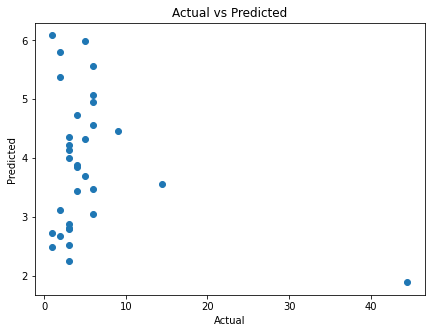

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

Predicted Values

In [40]:
pred_y_df = pd.DataFrame({'Actual value': y_test,'Predicted value':y_pred,'Difference':y_test-y_pred})
pred_y_df[0:20]

,Actual value,Predicted value,Difference
0,2.0,2.674993,-0.674993
1,3.0,4.226157,-1.226157
2,6.0,5.557037,0.442963
3,6.0,3.043675,2.956325
4,3.0,2.522151,0.477849
5,4.0,3.878306,0.121694
6,1.0,6.085382,-5.085382
7,1.0,2.478737,-1.478737
8,4.0,4.724580,-0.724580
9,14.4,3.552639,10.847361
